In [160]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [161]:
## read CSV File 
df = pd.read_csv('weight_height_data.csv')

Text(0, 0.5, 'Height')

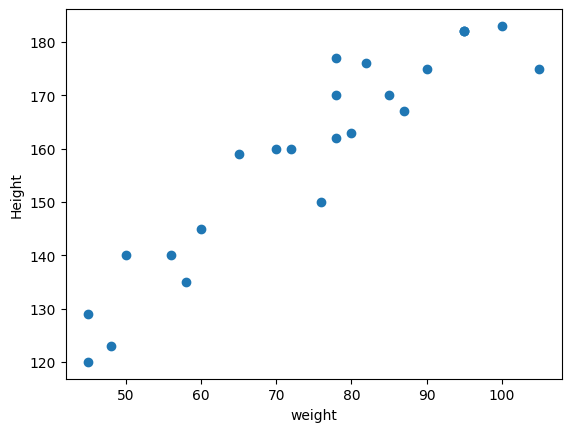

In [162]:
plt.scatter(df['Weight'] , df['Height'])
plt.xlabel("weight")
plt.ylabel("Height")

In [163]:
## Divide my dataset into independent and dependent features
X = df[['Weight']]
y = df['Height']

In [164]:
## Train test Split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.20 , random_state=42)

In [165]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((19, 1), (5, 1), (19,), (5,))

In [166]:
## Standardize the dataset Train independent data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()


In [167]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [168]:
## Train the simple linear Regression Model
from sklearn.linear_model import LinearRegression

In [169]:
regressor = LinearRegression()

In [170]:
regressor.fit(X_train,y_train)

LinearRegression()

In [171]:
print("The Slope or the coefficient of weight is ", regressor.coef_)
print("The Intercept :" , regressor.intercept_)

The Slope or the coefficient of weight is  [17.23238776]
The Intercept : 158.47368421052633


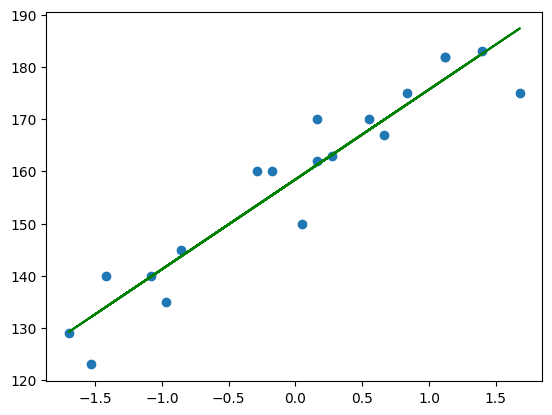

In [172]:
plt.scatter(X_train,y_train)
plt.plot(X_train,regressor.predict(X_train),'g')

## Prediction of Train Data

1. **Predicted height output** = intercept + coef (Weights)  
2. `y_pred_train = 65.4364 + 1.26 * X_train`  

---

## Prediction of Test Data

1. **Predicted height output** = intercept + coef (Weights)  
2. `y_pred_test = 65.4364 + 1.26 * X_test`


In [173]:
y_pred_test = regressor.predict(X_test)

# Performance Metrics

* **MSE** (Mean Squared Error)
* **MAE** (Mean Absolute Error)
* **RMSE** (Root Mean Squared Error)

* **R-squared** (Coefficient of Determination)
* **Adjusted R-squared**

In [174]:
from sklearn.metrics import mean_squared_error,mean_absolute_error

In [175]:
mse = mean_squared_error(y_test,y_pred_test)
mae = mean_absolute_error(y_test,y_pred_test)
rmse = np.sqrt(mse)
print(mse)
print(mae)
print(rmse)

115.71303962109548
10.110872730462228
10.756999564055745


In [176]:
from sklearn.metrics import r2_score
score = r2_score(y_test,y_pred_test)

# Adjusted R Square

**Adjusted R2 = 1 - [(1-R2)*(n-1)/(n-k-1)]**

where:

* **R2:** The R2 of the model
* **n:** The number of observations
* **k:** The number of predictor variables

In [177]:
#display adjusted R-squared
1 - (1-score)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)

0.7022463084218633

In [178]:
## lets if the given weight is 80
scaled_weight = scaler.transform([[80]])
## now predicted height will be
print(scaled_weight)
pred_height = regressor.predict(scaled_weight)
print(pred_height)

[[0.27246853]]
[163.16896763]


f:\udemy-final\python\venv\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


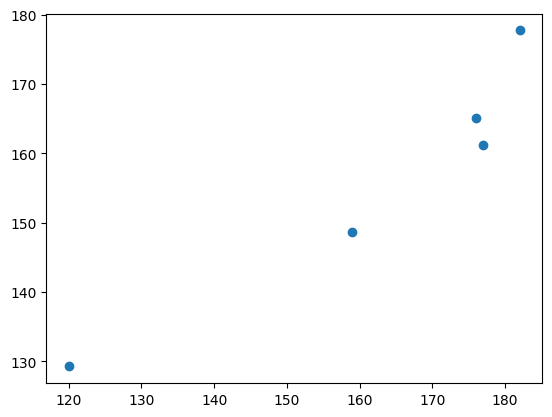

In [179]:
## Assumptions
## Plot a sactter plot for the prediction
plt.scatter(y_test,y_pred_test)

In [181]:
## Residuals
residuals = y_test - y_pred_test
residuals

8      4.285861
16    15.770389
0     -9.230234
18    10.376204
11    10.891676
Name: Height, dtype: float64

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_2456\2998236850.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(residuals,kde=True)


<Axes: xlabel='Height', ylabel='Density'>

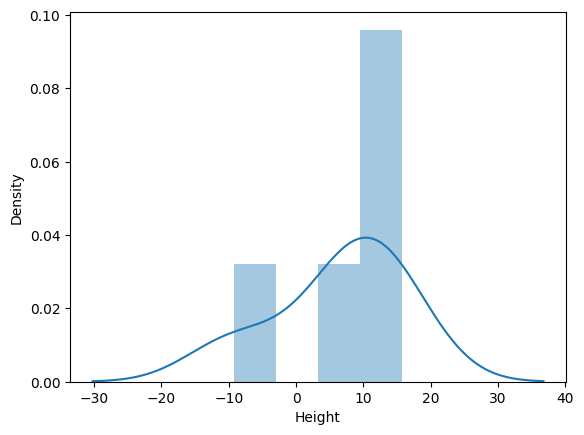

In [182]:
## plotting the residuals
import seaborn as sns
sns.distplot(residuals,kde=True)

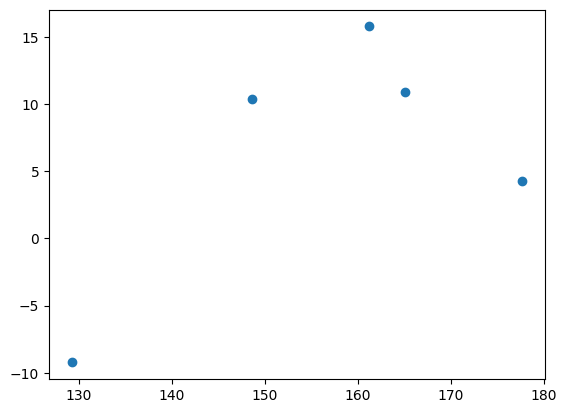

In [183]:
## if we plot with respect to predition and residuals
## Then it should be uniform distribution
plt.scatter(y_pred_test,residuals)